In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
#import mlxtend
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import pca
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_boston

In [2]:
%matplotlib inline
%matplotlib inline
hyper = pd.read_csv('femalepre2.csv').drop('id',1)
feature_names = ['Age', 'Obese', 'bmi', 'wc' , 'hc' , 'whr' , 'SBP' , 'DBP']
#X = hyper[feature_names]
#y = hyper['hyper']
print(hyper.head())
print("dimension of Hypertension data: {}".format(hyper.shape))
X = hyper.drop('hyper',1)
y = hyper['hyper']


   Age  Obese    bmi  wc   hc  whr     SBP    DBP  hyper
0   31      0  28.76  88  101   87  128.00  74.33      0
1   21      0  27.59  86  110   78  123.33  70.00      0
2   23      0  22.45  72  104   69   90.00  56.67      1
3   24      0  28.16  89  108   82  126.67  90.00      0
4   20      0  25.05  81  108   75  120.00  69.00      1
dimension of Hypertension data: (224, 9)


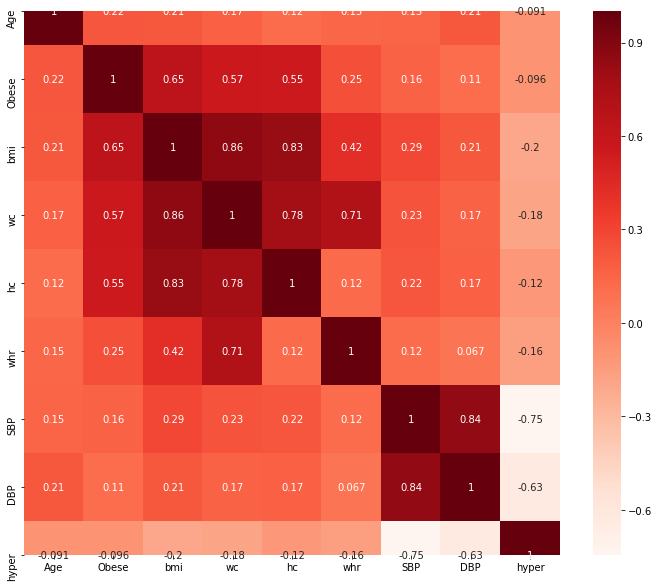

In [3]:
plt.figure(figsize=(12,10))
cor = hyper.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
corr_matrix = hyper.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95

    
to_drop = [column for column in upper.columns if any(upper[column] > 0.80 )] 

   


hyper.drop(to_drop, axis=1, inplace=True)

print(hyper.head())
# Drop features 
print(hyper.columns)
print("dimension of Hypertension data: {}".format(hyper.shape))
print(hyper.groupby('hyper').size())


   Age  Obese    bmi  whr     SBP  hyper
0   31      0  28.76   87  128.00      0
1   21      0  27.59   78  123.33      0
2   23      0  22.45   69   90.00      1
3   24      0  28.16   82  126.67      0
4   20      0  25.05   75  120.00      1
Index(['Age', 'Obese', 'bmi', 'whr', 'SBP', 'hyper'], dtype='object')
dimension of Hypertension data: (224, 6)
hyper
0     95
1    129
dtype: int64


In [5]:
LR= LogisticRegression()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(kernel='linear',random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20,random_state=1)
DT=DecisionTreeClassifier(random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=7)
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    fpr, tpr, thresholds = metrics.roc_curve(y_te, predict, pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print('AUC',auc)
    
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))

In [7]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)

In [8]:
print("Logistic Regression:")
crossV(LR,X,y)
model(LR,X_train, X_test, y_train, y_test)
print("Suport Vector Machine:")
crossV(SVM,X,y)
model(SVM,X_train, X_test, y_train, y_test)
print("MLP:")
crossV(MLP,X,y)
model(MLP,X_train, X_test, y_train, y_test)
print("Naive Bayes:")
crossV(NB,X,y)
model(NB,X_train, X_test, y_train, y_test)
print(" KNN:")
crossV(KNN,X,y)
model(KNN,X_train, X_test, y_train, y_test)
print("Decision Tree :")
crossV(DT,X,y)
model(DT,X_train, X_test, y_train, y_test)
print("Random forest  :")
crossV(RF,X,y)
model(RF,X_train, X_test, y_train, y_test)
print("CART   :")
crossV(CART,X,y)
model(CART,X_train, X_test, y_train, y_test)

Logistic Regression:
Cross Validation: 
Accuracy :  94.68191229060794
f1 :  94.55617937448602
recall :  94.60470085470088


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

precision :  94.82564657564657
MAE = 0.0667
accuracy score 93.33333333333333
AUC 0.9333333333333333
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Train acc:  0.9742268041237113
test acc:  0.9333333333333333
Suport Vector Machine:
Cross Validation: 
Accuracy :  98.26086956521738
f1 :  98.23210171894384
recall :  98.23076923076923
precision :  98.45238095238095
MAE = 0.0333
accuracy score 96.66666666666667
AUC 0.9666666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.9

/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

Accuracy :  42.38848108413326


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', a

f1 :  29.764418377321604


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't co

recall :  50.0


/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/duna/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted

precision :  21.19424054206663
MAE = 0.5000
accuracy score 50.0
AUC 0.5
Classification report 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Train acc:  0.41237113402061853
test acc:  0.5
Naive Bayes:
Cross Validation: 
Accuracy :  85.76698663655186
f1 :  84.67941921275781
recall :  84.36324786324786
precision :  88.37582882803471
MAE = 0.2000
accuracy score 80.0
AUC 0.8
Classification report 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.74      0.93      0.82        15

    accuracy                           0.80        30
   macro avg       0.82      0.80      0.80        30
weighted avg       0.82      0.80      0.80     

In [ ]:
print(hyper.head())